# Python for Finance Practice
This notbook was made to practice my ability to analyze and visualize the realistic data sets such as stock prices for a period. This practice includes some basic financial knowledge for algorithm trading. But for the sake of practice, we will focus more on the practical use rather than the theories behind.

In [1]:
# Import the necessary libraries
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas_datareader as pdr
% matplotlib inline
from pandas_datareader import data as pdr
import fix_yahoo_finance as fyf

## Python Basics For Finance: Pandas

### Importing Data

At this point, there is a lot going on in the open-source community because of the changes to the Yahoo!Finance API. Therefore, we bothn use pandas_datareader package and fix_yahoo_finance to get data. We will have five columns that contain observations of the period and the opening, high, low, and closing prices of that period. The 'Volumn' column is used to register the number of shares that got traded during a single day. The 'Adj Close' is the adjusted closing price: it is the closing price that occurred at any time before the next day's open. We will use this column to examine the historical returns. 

In [4]:
# import data
goog = pdr.get_data_yahoo('GOOG', 
                          start=datetime.datetime(2017, 1, 1), 
                          end=datetime.datetime(2019, 3, 1))
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,789.630005,775.799988,778.809998,786.140015,1657300,786.140015
2017-01-04,791.340027,783.159973,788.359985,786.900024,1073000,786.900024
2017-01-05,794.479980,785.020020,786.080017,794.020020,1335200,794.020020
2017-01-06,807.900024,792.203979,795.260010,806.150024,1640200,806.150024
2017-01-09,809.966003,802.830017,806.400024,806.650024,1272400,806.650024


### Working with Time Series Data
Before the analysis, we need to get familiar with the data type. 
A time series is a sequence of numerical data points taken at successive equally spaced points in time. In investing, a time series tracks the movement of the chosen data points, such as the stock price, over a specified period of time with data points recorded at regular intervals. 

In [5]:
#Inspect the index
print(goog.index)

# Inspect the columns
print(goog.columns)

# Select only the last 10 observations of 'Close'
ts = goog['Close'][-10:]

# Check the type of 'ts'
print(type(ts))

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2019-02-15', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-25', '2019-02-26', '2019-02-27',
               '2019-02-28', '2019-03-01'],
              dtype='datetime64[ns]', name='Date', length=543, freq=None)
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')
<class 'pandas.core.series.Series'>


In [6]:
# Inspect the first rows of December 2017
print(goog.loc[pd.Timestamp('2017-12-01'):pd.Timestamp('2017-12-31')].head())
# Inspect the 'Open' and 'Close' value at 2017-01-03
print(goog.iloc[[0], [0, 3]])

                   High          Low         Open        Close   Volume  \
Date                                                                      
2017-12-01  1022.489990  1002.020020  1015.799988  1010.169983  1909600   
2017-12-04  1016.099976   995.570007  1012.659973   998.679993  1906400   
2017-12-05  1020.609985   988.280029   995.940002  1005.150024  2067300   
2017-12-06  1024.969971  1001.140015  1001.500000  1018.380005  1272000   
2017-12-07  1034.239990  1018.070984  1020.429993  1030.930054  1458200   

              Adj Close  
Date                     
2017-12-01  1010.169983  
2017-12-04   998.679993  
2017-12-05  1005.150024  
2017-12-06  1018.380005  
2017-12-07  1030.930054  
                  High       Close
Date                              
2017-01-03  789.630005  786.140015


In [9]:
# Sample 20 rows
sample = goog.sample(20)
print(sample)

#Resample to monthly level
monthly_goog = goog.resample('M')
print(monthly_goog)

                   High          Low         Open        Close   Volume  \
Date                                                                      
2017-10-30  1024.969971  1007.500000  1014.000000  1017.109985  2085100   
2017-07-18   968.039978   950.599976   953.000000   965.400024  1154000   
2017-03-24   821.929993   808.890015   820.080017   814.429993  1981000   
2018-04-27  1049.500000  1025.589966  1046.000000  1030.050049  1619800   
2017-01-18   806.205017   800.989990   805.809998   806.070007  1294400   
2018-10-10  1132.170044  1081.130005  1131.079956  1081.219971  2675700   
2017-02-24   829.000000   824.200012   827.729980   828.640015  1392200   
2018-12-04  1104.420044  1049.979980  1103.119995  1050.819946  2345200   
2017-03-29   832.765015   822.380005   825.000000   831.409973  1786300   
2017-08-17   926.859985   910.979980   925.780029   910.979980  1277200   
2018-06-20  1186.286011  1169.160034  1175.310059  1169.839966  1648500   
2017-06-26   973.309998  

In [11]:
# Add a column 'diff' to represent the difference between 'Open' and 'Close' for days
goog['diff'] = goog.Open - goog.Close
goog.head(10)

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2017-01-03,789.630005,775.799988,778.809998,786.140015,1657300,786.140015,-7.330017
2017-01-04,791.340027,783.159973,788.359985,786.900024,1073000,786.900024,1.459961
2017-01-05,794.479980,785.020020,786.080017,794.020020,1335200,794.020020,-7.940002
2017-01-06,807.900024,792.203979,795.260010,806.150024,1640200,806.150024,-10.890015
2017-01-09,809.966003,802.830017,806.400024,806.650024,1272400,806.650024,-0.250000
2017-01-10,809.130005,803.510010,807.859985,804.789978,1176800,804.789978,3.070007
2017-01-11,808.150024,801.369995,805.000000,807.909973,1065900,807.909973,-2.909973
2017-01-12,807.390015,799.169983,807.140015,806.359985,1353100,806.359985,0.780029
2017-01-13,811.223999,806.690002,807.479980,807.880005,1099200,807.880005,-0.400024


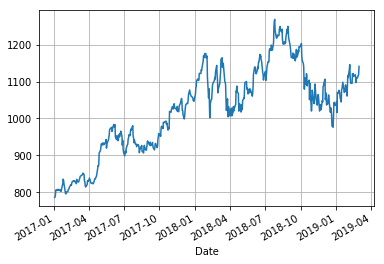

In [12]:
import matplotlib.pyplot as plt

# Plot the closing prices for google
goog['Close'].plot(grid=True)
plt.show()

## Common Financial Analysis
Now we have a general idea of the data, it is time to dive deeper. 
### Returns
We want to calculate the daily percentage change first. After that, we can investigate more about the data by resampling it. 

In [13]:
# Assign 'Adj Close' to 'daily_close'
daily_close = goog[['Adj Close']]

# Daily returns 
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change() + 1)
print(daily_log_returns)

            Adj Close
Date                 
2017-01-03   0.000000
2017-01-04   0.000967
2017-01-05   0.009048
2017-01-06   0.015277
2017-01-09   0.000620
2017-01-10  -0.002306
2017-01-11   0.003877
2017-01-12  -0.001919
2017-01-13   0.001885
2017-01-17  -0.004048
2017-01-18   0.001815
2017-01-19  -0.004832
2017-01-20   0.003547
2017-01-23   0.017751
2017-01-24   0.005566
2017-01-25   0.014323
2017-01-26  -0.004212
2017-01-27  -0.010623
2017-01-30  -0.025495
2017-01-31  -0.006893
2017-02-01  -0.001374
2017-02-02   0.003563
2017-02-03   0.003707
2017-02-06  -0.000187
2017-02-07   0.007026
2017-02-08   0.001747
2017-02-09   0.001460
2017-02-10   0.005077
2017-02-13   0.006846
2017-02-14   0.001477
...               ...
2019-01-17   0.008261
2019-01-18   0.007670
2019-01-22  -0.025258
2019-01-23   0.004717
2019-01-24  -0.001553
2019-01-25   0.015914
2019-01-28  -0.019166
2019-01-29  -0.008840
2019-01-30   0.026815
2019-01-31   0.025077
2019-02-01  -0.005034
2019-02-04   0.019851
2019-02-05

In [14]:
# Resample 'goog' to business months, take last observation as value
monthly = goog.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample 'goog' to quarters, take the mean as value per quarter 
quarter = goog.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2017-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,0.063854,0.066317,0.063675,0.064889,-0.151625,0.064889,2.653869
2017-09-30,0.092148,0.087654,0.091544,0.089497,0.138647,0.089497,-1.181152
2018-01-31,0.115366,0.116263,0.114013,0.116081,-0.161301,0.116081,-7.619581
2018-05-31,0.030307,0.019251,0.025680,0.023517,0.445105,0.023517,-1.337593
2018-09-30,0.099699,0.107751,0.103242,0.104720,-0.254692,0.104720,-2.721399
2019-01-31,-0.088351,-0.098767,-0.092541,-0.094613,0.284071,-0.094613,-2.633881
2019-05-31,0.034025,0.046051,0.037932,0.041675,-0.183051,0.041675,-2.505988


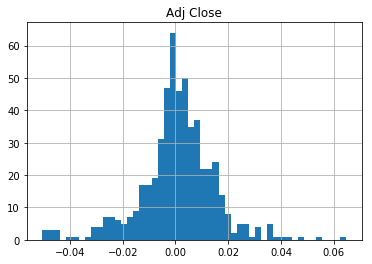

        Adj Close
count  542.000000
mean     0.000792
std      0.014445
min     -0.050579
25%     -0.005022
50%      0.001177
75%      0.008334
max      0.064780


In [33]:
import matplotlib.pyplot as plt

daily_pct_c.hist(bins=50)
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

The cumulative daily rate of return is useful to determine the value of an investment at regular intervals. We can calculate the cumulative daily rate of return by adding one to the daily percentage change value and calculating with the cumprod() method. 

In [17]:
# Calculate the cumulative daily returns
cum_daily_return = (1+daily_pct_c).cumprod()
print(cum_daily_return)

            Adj Close
Date                 
2017-01-03        NaN
2017-01-04   1.000967
2017-01-05   1.010024
2017-01-06   1.025453
2017-01-09   1.026090
2017-01-10   1.023723
2017-01-11   1.027692
2017-01-12   1.025721
2017-01-13   1.027654
2017-01-17   1.023495
2017-01-18   1.025352
2017-01-19   1.020397
2017-01-20   1.024016
2017-01-23   1.042193
2017-01-24   1.047994
2017-01-25   1.063004
2017-01-26   1.058526
2017-01-27   1.047282
2017-01-30   1.020582
2017-01-31   1.013547
2017-02-01   1.012154
2017-02-02   1.015761
2017-02-03   1.019526
2017-02-06   1.019335
2017-02-07   1.026496
2017-02-08   1.028290
2017-02-09   1.029791
2017-02-10   1.035019
2017-02-13   1.042104
2017-02-14   1.043644
...               ...
2019-01-17   1.386394
2019-01-18   1.397029
2019-01-22   1.361742
2019-01-23   1.368166
2019-01-24   1.366042
2019-01-25   1.387781
2019-01-28   1.361182
2019-01-29   1.349149
2019-01-30   1.385326
2019-01-31   1.420065
2019-02-01   1.412916
2019-02-04   1.440965
2019-02-05

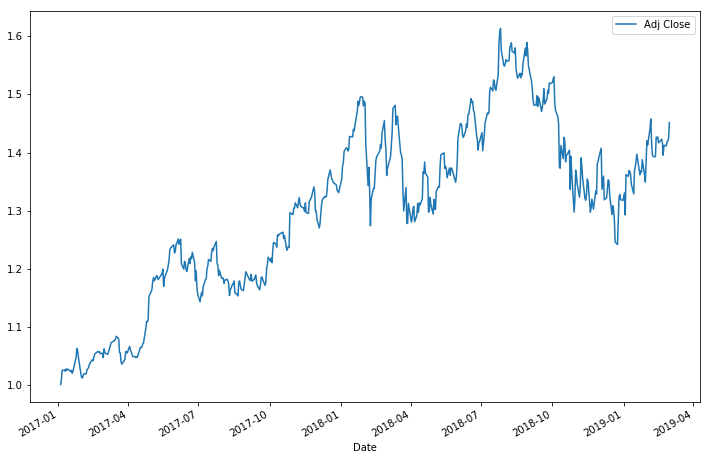

In [18]:
cum_daily_return.plot(figsize=(12,8))
plt.show()

We can also calculate the monthly returns by resampling the data. 

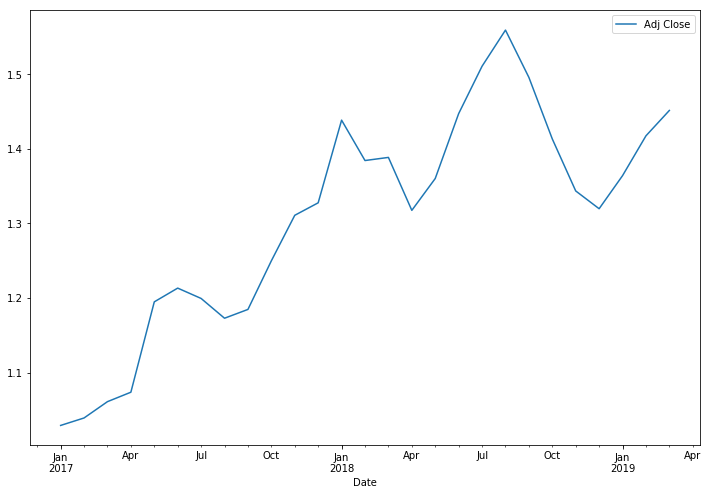

In [34]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()
cum_monthly_return.plot(figsize=(12,8))
plt.show()

We can tell that the cum_monthly_return can not give us the accurate information. 

### Stocks Comparison
We can make a function that takes in the ticker, or the symbol of the stocks, a start date, and an end date. This function will maps the stocks with their price respectively. 

In [22]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['GOOG', 'MSFT', 'IBM', 'AAPL']
all_data = get(tickers, datetime.datetime(2017,1,1), datetime.datetime(2019, 3, 1))
all_data.head()

High         Low        Open       Close     Volume  \
Ticker Date                                                                    
GOOG   2017-01-03  789.630005  775.799988  778.809998  786.140015  1657300.0   
       2017-01-04  791.340027  783.159973  788.359985  786.900024  1073000.0   
       2017-01-05  794.479980  785.020020  786.080017  794.020020  1335200.0   
       2017-01-06  807.900024  792.203979  795.260010  806.150024  1640200.0   
       2017-01-09  809.966003  802.830017  806.400024  806.650024  1272400.0   

                    Adj Close  
Ticker Date                    
GOOG   2017-01-03  786.140015  
       2017-01-04  786.900024  
       2017-01-05  794.020020  
       2017-01-06  806.150024  
       2017-01-09  806.650024

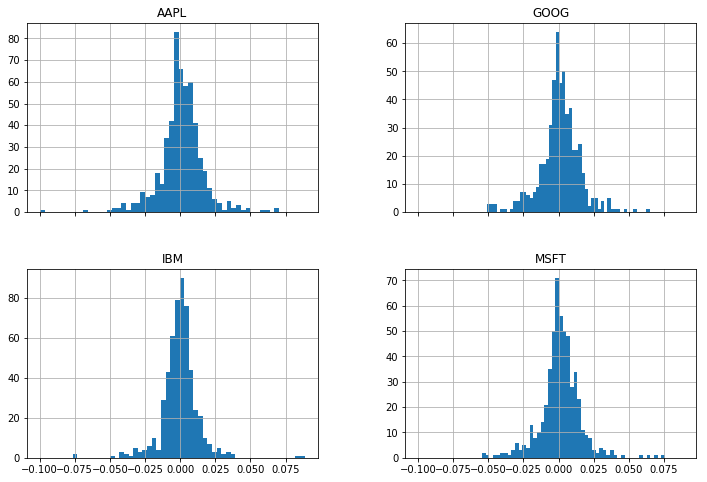

In [23]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

plt.show()

We can also analyze the data with the scatter matrix. 

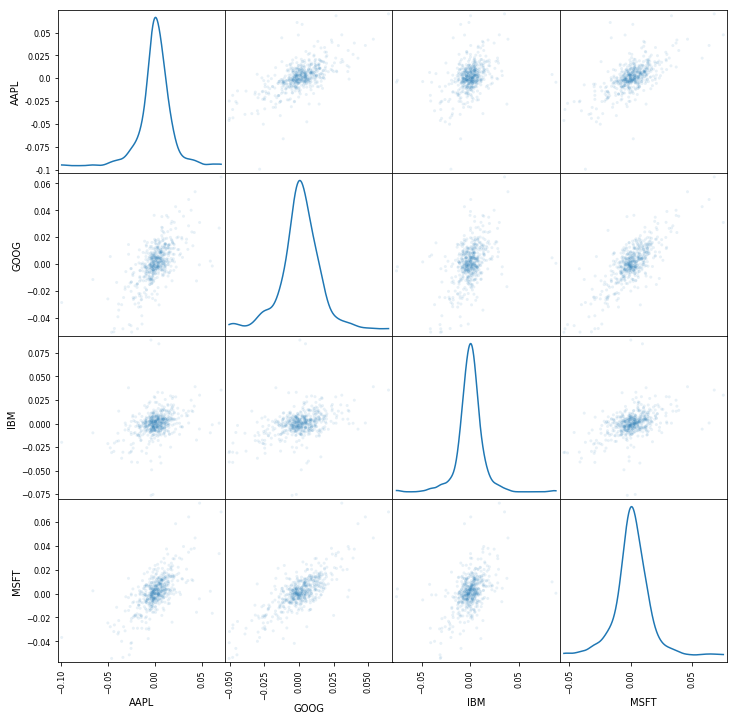

In [24]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

plt.show()

### Moving windows
Moving windows are there when you compute the statistic on a window of data represented by a particular period of time and then slide the window across the data by a specified interval. That way, the statistic is continually calculated as long as the window falls first within the dates of the time series. More directly, the rolling mean smoothes out short-term fluctuations and highlight long-term trends in data. 

In [26]:
# Isolate the adjusted closing prices 
adj_close_px = goog['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2019-02-15    1073.303996
2019-02-19    1075.692747
2019-02-20    1078.302499
2019-02-21    1081.238249
2019-02-22    1084.592000
2019-02-25    1086.340501
2019-02-26    1088.121751
2019-02-27    1090.096004
2019-02-28    1092.203755
2019-03-01    1094.582256
Name: Adj Close, dtype: float64

We can also test how the difference between rolling means will affect the graph.

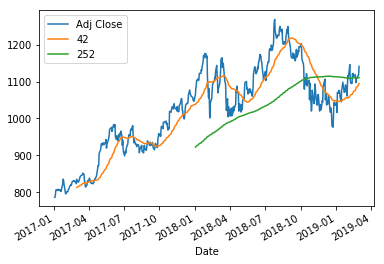

In [27]:
# Short moving window rolling mean
goog['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
goog['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
goog[['Adj Close', '42', '252']].plot()

plt.show()

### Volatility Calculation
The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time. It is common to compare the volatility of a stock with another stock to get a feel for which may have less risk or to a market index to examine the stock's volatility in the overall market. Generally, the higher the volatility, the riskier the investment in that stock, which results in investing in one over another.  

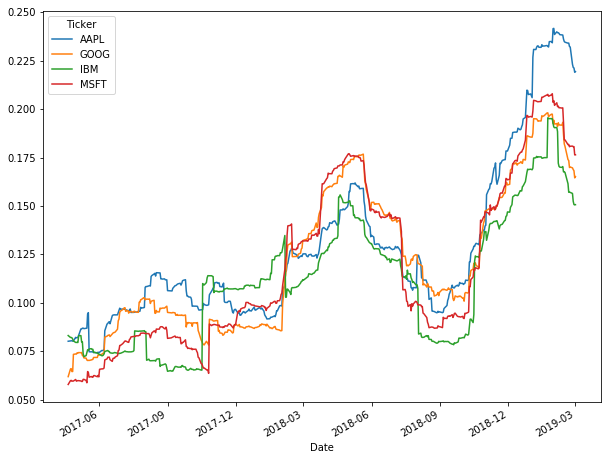

In [28]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

plt.show()

### Ordinary Least-Squares Regression (OLS)
We also want to analyze the data with traditional regression. We prefer to use 'statsmodels' in this case, which not only provides the classes and functions to estimate many different statistical models, but also allows us to conduct statitical test and perform statistical data exploration. 

In [29]:
import statsmodels.api as sm
from pandas import tseries
from pandas.core import datetools

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the GOOG returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'GOOG']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the AAPL returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with GOOG and AAPL returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['GOOG', 'AAPL']

# Add a constant 
X = sm.add_constant(return_data['GOOG'])

# Construct the model
model = sm.OLS(return_data['AAPL'],X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     379.3
Date:                Sun, 31 Mar 2019   Prob (F-statistic):           2.16e-64
Time:                        15:29:26   Log-Likelihood:                 1622.7
No. Observations:                 542   AIC:                            -3241.
Df Residuals:                     540   BIC:                            -3233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.647      0.5

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


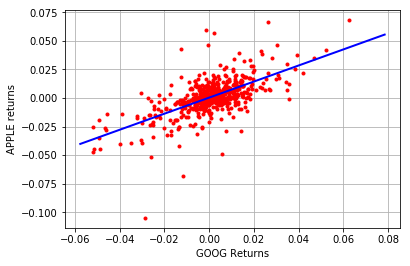

In [30]:
plt.plot(return_data['GOOG'], return_data['AAPL'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('GOOG Returns')
plt.ylabel('APPLE returns')

plt.show()

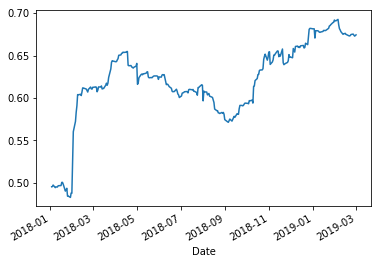

In [31]:
return_data['AAPL'].rolling(window=252).corr(return_data['GOOG']).plot()
plt.show()

## Building A Trading Strategy
In general, there are two common trading strategies: the momentum strategy and the reversion strategy. 
<br>
<br>
The **momentum strategy** is also called divergence or trend trading. When we follow this strategy, we do so because we believe the movement of a quantity will continue in this current direction, we believe that stocks have momentum or upward or downward trends that we can detect and exploit. (*moving average crossover*, *dual moving average crossover*, *turtle trading*)
<br>
<br>
The **reversion strategy** is also known as convergence or cycle trading. This strategy departs from the belief that the movement of a quantity will eventually reverse, which actually means that stocks return to their mean and that we can exploit when it deviates from that mean. 
<br>
<br>
Next, we are going to follow the steps of the moving average crossover to do the analysis. 
<br>
1. First, define two different lookback period.
<br>
2. Next, make an empty DataFrame that we can use to calculate the daily buy or sell signal for the data.
<br>
3. Then, create the set of short and long simple moving averages over the respective long and short time windows. 
<br> 
4. At last, we should create a signal when the short moving average crosses the long moving average, but only for the period greater than the shortest moving average window. Then, we take their difference. 

In [39]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=goog.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = goog['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = goog['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()


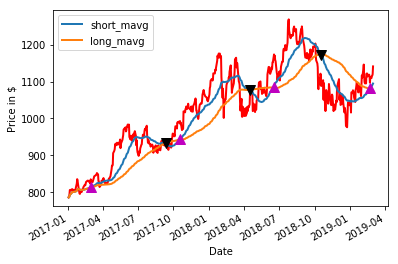

In [40]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
goog['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

## Backtesting The Trading Strategy
Now we have got the trading strategy, we want to backtest it and calculate its performance. 

### Backtesting Components
1. A data handler, which is an interface to a set of data,
2. A strategy, which generates a signal to go long or go short based on the data,
3. A portfolio, which generates orders and manages profit and loss,
4. An execution handler, which sends the order to the broker and receives the "fills" or signals that the stocks has been bought or sold.

In [41]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['GOOG'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(goog['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(goog['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(goog['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

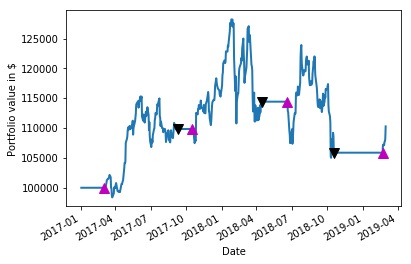

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

## Evaluating Moving Average Crossover Strategy
We can use Pandas to calculate some metrics to further judge our simple trading strategy. 
### Sharpe Ratio
Sharpe ratio is a way to examine the performance of an investment by adjusting for its risk. The ratio measures the excess return per unit of deviation in an investment asset or a trading strategy, typically referred to as risk. 

In [43]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.36772425587


We can see that the sharpe ratio is pretty low, which indicates that it is not that worthy to buy google's stock compared to others.

### Maximum Drawdown

*Maximum drawdown* is used to measure the largest single drop from peak to bottom in the value of a portfolio. It is usually helpful to measure when the new peak will achieve. The score indicates the risk of a portfolio chosen based on a certain strategy. 

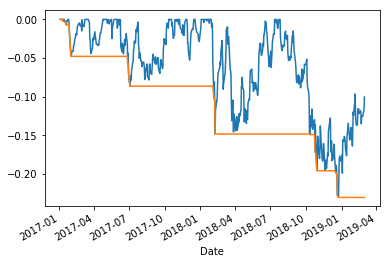

In [44]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = goog['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = goog['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

### Compound Annual Growth Rate (CAGR)
*Compound Annual Growth Rate* provides a constant rate of return over the time period. In other words, the rate tells what we really have at the end of our investment period. 

In [45]:
# Get the number of days in `aapl`
days = (goog.index[-1] - goog.index[0]).days

# Calculate the CAGR 
cagr = ((((goog['Adj Close'][-1]) / goog['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.188058019195
